In [1]:
import pandas as pd
import numpy as np

In [5]:
train_data = pd.read_csv('./data/MBTI_train.csv', header=None, encoding = 'ISO 8859-1')
test_data = pd.read_csv('./data/MBTI_test.csv', header =None,encoding = 'ISO 8859-1')

In [11]:
print(train_data.shape)
train_data.head()

(74357, 2)


,0,1
0,INTP,say process model list like subscriber channel...
1,INFJ,upon much manipulate retail finish like sacrif...
2,INFJ,fit yes certain bff social feel goal go know n...
3,INTJ,complete love within someone ideal joke solvea...
4,ENTJ,public strictly thing person x question person...


In [28]:
len(train_data.iloc[0,1])
len_list = []

for i in range(0, 74357):
    len_list.append(len(train_data.iloc[i, 1]))
    
print(max(len_list))
print(min(len_list))
print(np.mean(len_list))
print(np.std(len_list))

12536
1843
2604.4924351439677
90.84257423496065


In [10]:
print(test_data.shape)
test_data.head()

(9337, 1)


,0
0,get accept ya bite well stop important open lo...
1,offer rebel something war people friend block ...
2,soulmates contradiction easy basic recurrence ...
3,run nature q test let sound sarcastically irri...
4,hour fast fast suspend see strict wampum eight...


In [32]:
len(test_data.iloc[0,0])
len_list = []

for i in range(0, 9337):
    len_list.append(len(test_data.iloc[i, 0]))
    
print(max(len_list))
print(min(len_list))
print(np.mean(len_list))
print(np.std(len_list))

3605
2290
2604.156581343044
82.92704396753042


**전처리**

In [40]:
from keras.preprocessing.text import Tokenizer

In [41]:
tokenizer = Tokenizer(num_words = 1000) # 가장 빈도가 높은 1000개의 단어 
tokenizer.fit_on_texts(train_data.iloc[:,1]) # 단어 인덱스 구축


In [42]:
sequences = tokenizer.texts_to_sequences(train_data.iloc[:,1]) # 문자열을 정수 인덱스의 리스트로 변환
one_hot_results = tokenizer.texts_to_matrix(train_data.iloc[:,1], mode = 'binary') # 원핫 이진 벡터
word_index = tokenizer.word_index # 계산된 단어 인덱스

In [46]:
print(len(sequences))
print(one_hot_results.shape)
print(len(word_index)) # 고유한 단어 개수

74357
(74357, 1000)
172457


In [47]:
pd.DataFrame(one_hot_results) # 원핫인코딩

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74352,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74353,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74354,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
74355,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**단어 임베딩**

In [55]:
from keras.layers import Embedding
from keras import preprocessing

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 3000 # 사용할 텍스트의 길이


In [56]:
X_train = preprocessing.sequence.pad_sequences(sequences, maxlen = maxlen)

In [58]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,0,0,0,0,0,0,0,0,0,...,266,532,917,20,6,298,665,864,191,131
1,0,0,0,0,0,0,0,0,0,0,...,9,765,111,77,180,146,49,4,223,128
2,0,0,0,0,0,0,0,0,0,0,...,2,731,828,260,928,8,438,29,67,107
3,0,0,0,0,0,0,0,0,0,0,...,401,120,264,71,49,841,138,721,9,839
4,0,0,0,0,0,0,0,0,0,0,...,13,534,69,11,241,635,242,58,99,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74352,0,0,0,0,0,0,0,0,0,0,...,471,113,60,3,328,101,144,87,1,14
74353,0,0,0,0,0,0,0,0,0,0,...,34,67,695,25,301,466,30,16,21,98
74354,0,0,0,0,0,0,0,0,0,0,...,496,8,116,3,33,14,174,158,335,774
74355,0,0,0,0,0,0,0,0,0,0,...,450,631,885,49,93,349,120,38,109,247


In [90]:
y_train = train_data.iloc[:,0]

In [91]:
y_train.unique()

array(['INTP', 'INFJ', 'INTJ', 'ENTJ', 'ENTP', 'INFP', 'ISTP', 'ISFJ',
       'ENFP', 'ISFP', 'ISTJ', 'ENFJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [92]:
y_train = y_train.replace({'INTP':0, 'INFJ':1, 'INTJ':2, 'ENTJ':3, 'ENTP':4, 'INFP':5,
                 'ISTP':6, 'ISFJ':7, 'ENFP':8, 'ISFP':9, 'ISTJ':10, 'ENFJ':11,
                 'ESTP':12, 'ESFP':13, 'ESTJ':14, 'ESFJ':15})

In [93]:
def to_one_hot(labels, dimension = 16):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train_label = to_one_hot(y_train)

In [94]:
# data split
from sklearn.model_selection import train_test_split
X_sub_train, X_valid, y_sub_train, y_valid = train_test_split(X_train, y_train_label, random_state = 42)

**1**

In [96]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))

model.add(Flatten()) # (samples, maxlen * 8) 크기의 2D 텐서로 펼친다.

model.add(Dense(16, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 3000, 8)           80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 24000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                384016    
Total params: 464,016
Trainable params: 464,016
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model.fit(X_sub_train, y_sub_train, epochs =10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
1395/1395 [==============================] - 27s 18ms/step - loss: 1.9213 - accuracy: 0.3424 - val_loss: 1.3122 - val_accuracy: 0.6161
Epoch 2/10
1395/1395 [==============================] - 25s 18ms/step - loss: 1.1324 - accuracy: 0.6688 - val_loss: 1.0580 - val_accuracy: 0.6806
Epoch 3/10
1395/1395 [==============================] - 25s 18ms/step - loss: 0.9044 - accuracy: 0.7281 - val_loss: 1.0232 - val_accuracy: 0.6951
Epoch 4/10
1395/1395 [==============================] - 24s 17ms/step - loss: 0.7852 - accuracy: 0.7648 - val_loss: 1.0242 - val_accuracy: 0.6964
Epoch 5/10
1395/1395 [==============================] - 24s 17ms/step - loss: 0.7357 - accuracy: 0.7869 - val_loss: 1.0473 - val_accuracy: 0.6919
Epoch 6/10
1395/1395 [==============================] - 25s 18ms/step - loss: 0.6556 - accuracy: 0.8041 - val_loss: 1.0857 - val_accuracy: 0.6869
Epoch 7/10
1395/1395 [==============================] - 25s 18ms/step - loss: 0.5904 - accuracy: 0.8276 - val_loss: 1.1404 -

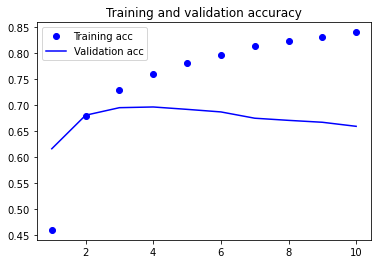

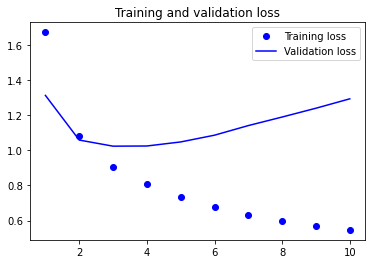

In [102]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**2**

In [104]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 16, input_length = maxlen))

model.add(Flatten()) # (samples, maxlen * 16) 크기의 2D 텐서로 펼친다.

model.add(Dense(16, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [105]:
history = model.fit(X_sub_train, y_sub_train, epochs =10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
1395/1395 [==============================] - 34s 23ms/step - loss: 1.8594 - accuracy: 0.3689 - val_loss: 1.2190 - val_accuracy: 0.6068
Epoch 2/10
1395/1395 [==============================] - 33s 23ms/step - loss: 0.9825 - accuracy: 0.7043 - val_loss: 1.0002 - val_accuracy: 0.6946
Epoch 3/10
1395/1395 [==============================] - 31s 22ms/step - loss: 0.7579 - accuracy: 0.7725 - val_loss: 1.0052 - val_accuracy: 0.6963
Epoch 4/10
1395/1395 [==============================] - 31s 22ms/step - loss: 0.6071 - accuracy: 0.8274 - val_loss: 1.0386 - val_accuracy: 0.6948
Epoch 5/10
1395/1395 [==============================] - 32s 23ms/step - loss: 0.5013 - accuracy: 0.8651 - val_loss: 1.1489 - val_accuracy: 0.6726
Epoch 6/10
1395/1395 [==============================] - 34s 24ms/step - loss: 0.3942 - accuracy: 0.8957 - val_loss: 1.2496 - val_accuracy: 0.6638
Epoch 7/10
1395/1395 [==============================] - 35s 25ms/step - loss: 0.3159 - accuracy: 0.9208 - val_loss: 1.3642 -

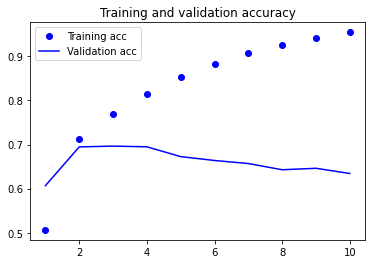

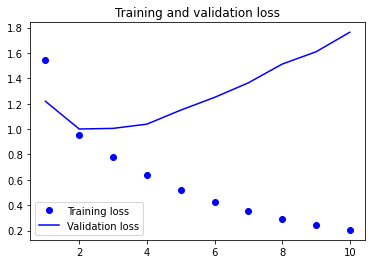

In [106]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**3**

In [107]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 64, input_length = maxlen))

model.add(Flatten()) # (samples, maxlen * 16) 크기의 2D 텐서로 펼친다.

model.add(Dense(16, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [108]:
history = model.fit(X_sub_train, y_sub_train, epochs =10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
1395/1395 [==============================] - 107s 76ms/step - loss: 1.8872 - accuracy: 0.4163 - val_loss: 1.0409 - val_accuracy: 0.6857
Epoch 2/10
1395/1395 [==============================] - 101s 72ms/step - loss: 0.7201 - accuracy: 0.7877 - val_loss: 1.1780 - val_accuracy: 0.6399
Epoch 3/10
1395/1395 [==============================] - 104s 75ms/step - loss: 0.3561 - accuracy: 0.9139 - val_loss: 1.1569 - val_accuracy: 0.6782
Epoch 4/10
1395/1395 [==============================] - 104s 75ms/step - loss: 0.1336 - accuracy: 0.9808 - val_loss: 1.3804 - val_accuracy: 0.6633
Epoch 5/10
1395/1395 [==============================] - 103s 74ms/step - loss: 0.0600 - accuracy: 0.9976 - val_loss: 1.6507 - val_accuracy: 0.6507
Epoch 6/10
1395/1395 [==============================] - 103s 74ms/step - loss: 0.0336 - accuracy: 0.9994 - val_loss: 1.9339 - val_accuracy: 0.6466
Epoch 7/10
1395/1395 [==============================] - 112s 80ms/step - loss: 0.0304 - accuracy: 0.9998 - val_loss: 2

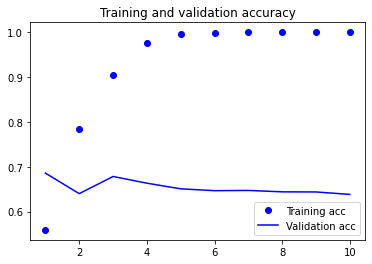

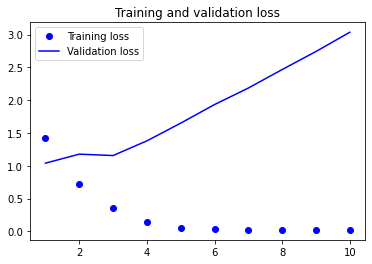

In [109]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [113]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

final_model = Sequential()
final_model.add(Embedding(1000, 8, input_length = maxlen))

final_model.add(Flatten()) # (samples, maxlen * 8) 크기의 2D 텐서로 펼친다.

final_model.add(Dense(16, activation = 'sigmoid'))
final_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [114]:
history = final_model.fit(X_sub_train, y_sub_train, epochs =4, batch_size = 32, validation_split = 0.2)

Epoch 1/4
1395/1395 [==============================] - 28s 19ms/step - loss: 1.9306 - accuracy: 0.3299 - val_loss: 1.2530 - val_accuracy: 0.6168
Epoch 2/4
1395/1395 [==============================] - 26s 19ms/step - loss: 1.1143 - accuracy: 0.6666 - val_loss: 1.0532 - val_accuracy: 0.6776
Epoch 3/4
1395/1395 [==============================] - 24s 17ms/step - loss: 0.8805 - accuracy: 0.7356 - val_loss: 1.0308 - val_accuracy: 0.6876
Epoch 4/4
1395/1395 [==============================] - 25s 18ms/step - loss: 0.7935 - accuracy: 0.7622 - val_loss: 1.0217 - val_accuracy: 0.6901


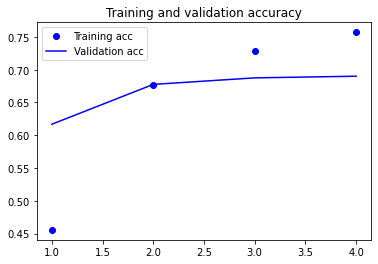

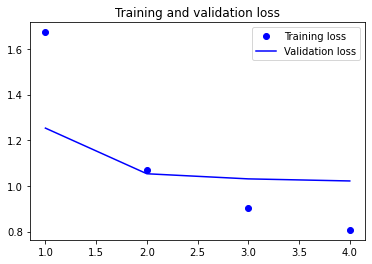

In [115]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [126]:
final_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 3000, 8)           8000      
_________________________________________________________________
flatten_5 (Flatten)          (None, 24000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                384016    
Total params: 392,016
Trainable params: 392,016
Non-trainable params: 0
_________________________________________________________________


In [127]:
from keras import models

layer_outputs = [layer.output for layer in model.layers]

activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

In [129]:
activations = activation_model.predict(X_train)

In [133]:
activations[0].shape

(74357, 3000, 8)

In [137]:
X_train_embedding_origin = pd.DataFrame(activations[1])

In [139]:
train_data_embedding_origin = pd.concat([train_data.iloc[:,0], X_train_embedding_origin], axis = 1)

,0,0,1,2,3,4,5,6,7,8,...,23990,23991,23992,23993,23994,23995,23996,23997,23998,23999
0,INTP,-0.001286,-0.003747,0.000229,-0.003474,0.001566,0.001364,-0.001096,0.000339,-0.001286,...,0.220714,-0.129301,-0.340332,-0.091654,0.131684,0.048239,-0.080523,0.100283,-0.323020,0.089665
1,INFJ,-0.001286,-0.003747,0.000229,-0.003474,0.001566,0.001364,-0.001096,0.000339,-0.001286,...,-0.107026,0.017579,-0.604435,-0.284760,-0.151563,0.084588,-0.468147,-0.239174,0.136235,0.470461
2,INFJ,-0.001286,-0.003747,0.000229,-0.003474,0.001566,0.001364,-0.001096,0.000339,-0.001286,...,-0.108518,-0.120392,0.011352,0.316336,0.107100,0.105718,0.203554,-0.011808,0.180761,-0.274756
3,INTJ,-0.001286,-0.003747,0.000229,-0.003474,0.001566,0.001364,-0.001096,0.000339,-0.001286,...,-0.006410,0.248040,0.152508,0.195529,0.324856,-0.069767,-0.206267,-0.106424,-0.145057,0.345620
4,ENTJ,-0.001286,-0.003747,0.000229,-0.003474,0.001566,0.001364,-0.001096,0.000339,-0.001286,...,-0.086226,-0.071585,-0.104656,-0.211368,-0.079513,0.133671,0.103270,-0.180409,0.124068,-0.136145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74352,INTP,-0.001286,-0.003747,0.000229,-0.003474,0.001566,0.001364,-0.001096,0.000339,-0.001286,...,0.123450,-0.039062,0.172886,0.102649,0.177526,0.183352,0.025147,0.297083,-0.167071,0.007530
74353,ENFP,-0.001286,-0.003747,0.000229,-0.003474,0.001566,0.001364,-0.001096,0.000339,-0.001286,...,0.106507,0.086660,-0.089607,-0.209620,-0.145444,-0.133252,-0.000052,-0.050470,0.018608,-0.186720
74354,INFP,-0.001286,-0.003747,0.000229,-0.003474,0.001566,0.001364,-0.001096,0.000339,-0.001286,...,0.071111,-0.113540,-0.030282,0.212133,-0.225992,-0.189433,-0.174662,-0.267561,-0.240258,-0.310397
74355,INTJ,-0.001286,-0.003747,0.000229,-0.003474,0.001566,0.001364,-0.001096,0.000339,-0.001286,...,0.081721,-0.157209,-0.186817,0.304526,0.233599,0.137988,-0.115879,0.128792,0.012008,-0.068670


In [ ]:
activations = activation_model.predict(X_train)